## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# Analysis and Predict the Price of the Used Car 


### Project participants:

* A. Raghul Sekar (mm20rs@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

This dataset contains the data and details of used cars of the UK. BMW manufactures these used cars. This information is being gathered in order to create a tool that will forecast how much individuals should sell their old vehicles for by comparing it to other items on the market. It has records of 24 models of cars from the year 1996 to 2020. Also, it contains the features of the cars like engine size, mileage, price etc. This dataset is downloaded from [Kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv).This dataset was published by Aditya who is Student at the University of Oxford. In this project, I am going to use only one CSV file.

* BMW.csv

This CSV file will provide all the necessary information that helps us predict the used cars' price.

### Column Description
* __Model:__   Model of the cars
* __Year:__   It tells the year of the car in which it is Registered 
* __Price:__   Price of the used cars in pounds (£)
* __Transmission:__   It tells the Gearbox type of the cars
* __Mileage:__   Miles travelled 
* __FuleType:__   car's Engine fule 
* __Tax:__   Road tax(£) that paid for the car
* __mpg:__   Miles per gallon of the car
* __EnginSize:__   Size of the engine in (L)

This CSV contains 10781 rows and 9 columns without any null values. This dataset is already cleaned and split from the car dataset, which contains all the Manufacturers.

The price column has numbers in the range of 1200 to 123456, whereas the year column covers data from 1996 to 2020. There are three different types of car gearboxes (Automatic, Manual, Semi-Auto). There are 43 percent of semi-automatic automobiles and 33 percent of automatic cars in this statistics.There are two primary items in the fule type column: one is petrol, and the other is diesel. In this dataset, 32 percent of automobiles are gasoline and 65 percent are diesel.


## Project Aim and Objectives (5 marks)

The project's goal is to do a visual analysis of the BMW used car dataset in the United Kingdom and estimate car prices, which will assist individuals in determining the value of their old vehicles.


### Specific Objective(s)


* __Objective 1:__ _Virtual analysis of the data of the used cars_
* __Objective 2:__ _Predicting the price of the Used BMW Cars_

  


## System Design (5 marks)


### Architecture



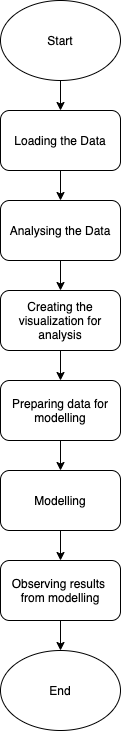

In [3]:
from IPython.display import Image 
Image("PDS flow chart.png")

### Processing Modules and Algorithms

* _Data is loaded from a CSV file as a data frame._
* _Analyzing the data frame to know how to proceed with visualization._
* _Creating a visualization of comparing different attributes._
* _Preparing the data for modelling. _
* _Developing models to predict the price of cars._


# Program Code (15 marks)



### _Data Processing_

#### Importing the packages

The following packages must be imported in order to do data analysis and visualisation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

#### Loading the data

Loading the data "bmw.csv" from the filesystem to carryout the next step. 

In [6]:
bmw = pd.read_csv('/Users/raghulsekar/Desktop/Programming for Data Science/A3/Dataset/bmw.csv')

Checking the dataset loaded.

In [7]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Finding the number of unique car models in the dataset.

In [18]:
n_model = bmw["model"].nunique()
print('Number of car models in this dataset is',n_model)

Number of car models in this dataset is 24


To checking the shape of the file.

In [9]:
bmw.shape

(10781, 9)

#### Checking null values


In [11]:
bmw.isna().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

#### Creating a new column "age"

To know the age of the column, I am creating a new column age by subtracting the year column from the current year.

In [21]:
bmw["age"] = 2021 - bmw["year"]

#### Summary of the data

In [22]:
bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10781.0,2017.078935,2.349038,1996.0,2016.0,2017.0,2019.0,2020.0
price,10781.0,22733.408867,11415.528189,1200.0,14950.0,20462.0,27940.0,123456.0
mileage,10781.0,25496.986550,25143.192559,1.0,5529.0,18347.0,38206.0,214000.0
tax,10781.0,131.702068,61.510755,0.0,135.0,145.0,145.0,580.0
mpg,10781.0,56.399035,31.336958,5.5,45.6,53.3,62.8,470.8
engineSize,10781.0,2.167767,0.552054,0.0,2.0,2.0,2.0,6.6
age,10781.0,3.921065,2.349038,1.0,2.0,4.0,5.0,25.0


We may deduce the following from the given summary statistics:

* Count column has a value 10781 in all rows, this mean there are 10781 rows in the dataset and there is no null value in the table.
* min shows all the minimum values in all respective columns.
* In the year row, we can see the min value is 1996, and the max value is 2020. This means data is in between the range of 1996 to 2020.
* Average age of the cars in this dataset is around four years.

## _Objective 1_

### _Virtual analysis of the data of the used cars_

#### Count Plot for the Car Models:

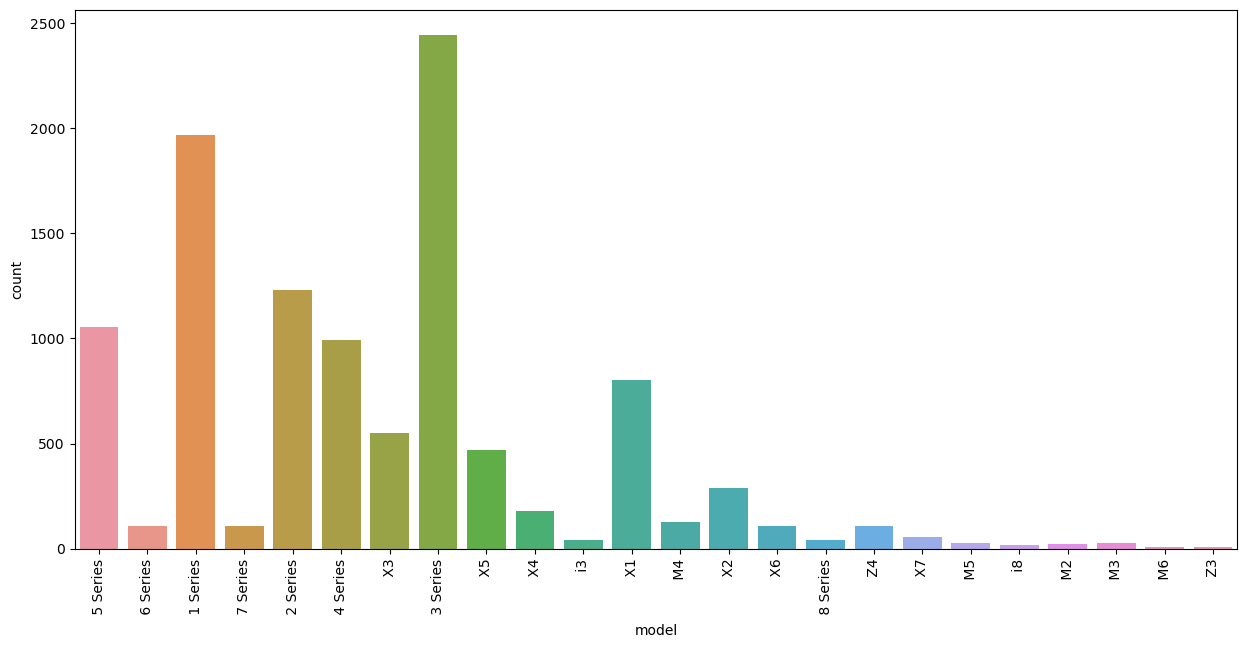

In [35]:
plt.figure(figsize=(15,7)) 
count_model = sns.countplot(x = bmw["model"])
count_model.tick_params(axis='x', rotation=90)

The above bar chart compares the number of cars in each model with other models.

#### Scatter plot of mileage and price with year as hue:

<AxesSubplot:xlabel='mileage', ylabel='price'>

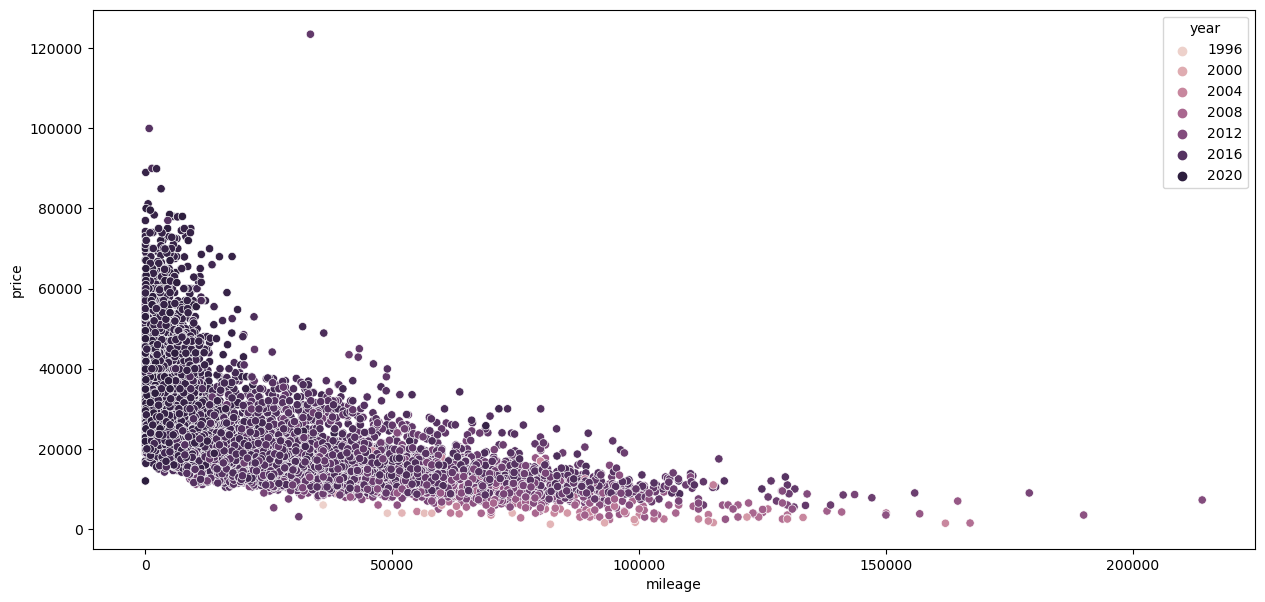

In [28]:
plt.style.use('default')
plt.figure(figsize=(15,7)) 
sns.scatterplot( x = bmw["mileage"], y = bmw["price"], hue = bmw["year"])

_From the above plot, we can see the price is high when the mileage is less. As the mileage gets increases price of the cars are getting decreases. And also we can note that most of the cars having high milage are from the early years. Most of the new cars price is high then the old cars._

#### Scatter plot of mileage and price with fule type as hue:

<AxesSubplot:xlabel='mileage', ylabel='price'>

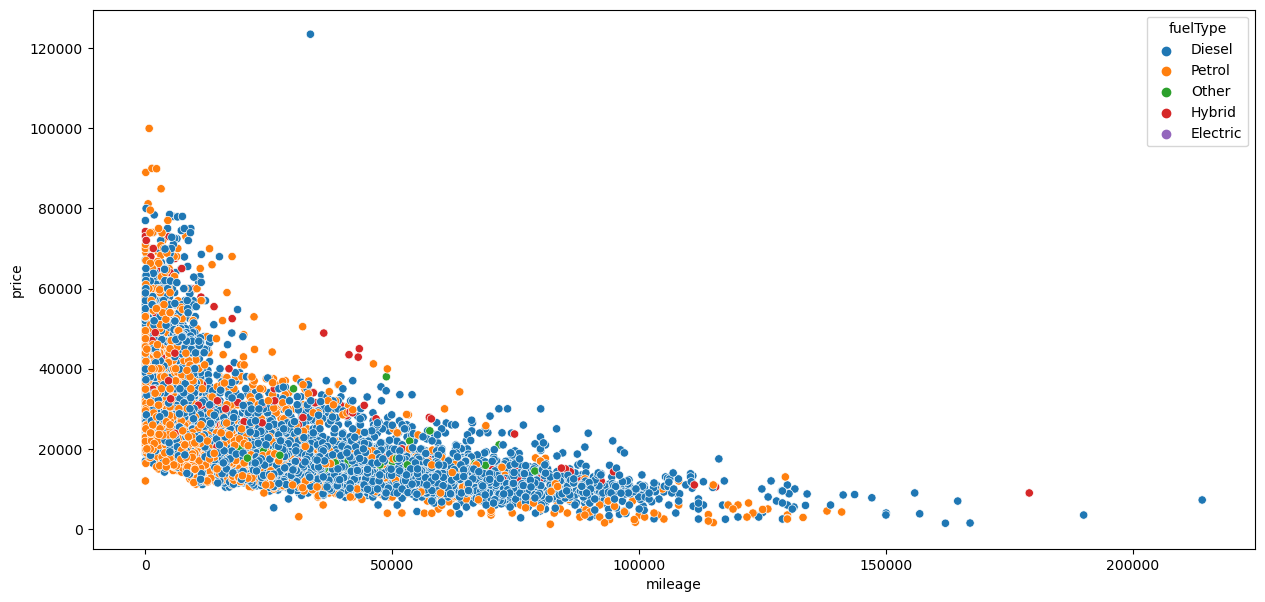

In [26]:
plt.figure(figsize=(15,7)) 
sns.scatterplot(x = bmw["mileage"], y = bmw["price"], hue = bmw["fuelType"])

This scatter plot shows that most diesel cars are less price and have driven high miles than petrol cars. The price of petrol cars is higher than diesel cars in less mileage, as the mileage increases the price of diesel cars is high.

#### Scatter plot of mileage and price with engine size as hue:

<AxesSubplot:xlabel='mileage', ylabel='price'>

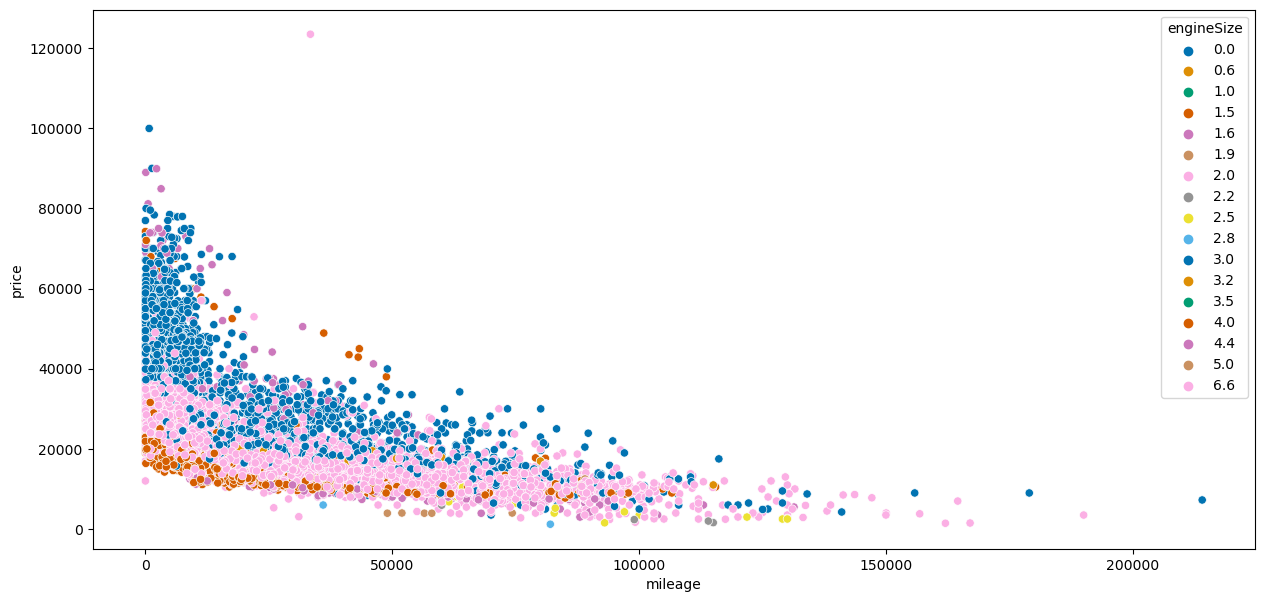

In [36]:
plt.figure(figsize=(15,7)) 
sns.scatterplot(x = bmw["mileage"], y = bmw["price"], hue = bmw["engineSize"],palette='colorblind')

From the above chart, we can see the size of the engine is less price of the car is high and as the size of the engine is getting high, price of the car is less. Also, only cars with large engine sizes are driven for long miles.

#### Scatter plot of year and price with fuel type as hue:

<AxesSubplot:xlabel='year', ylabel='price'>

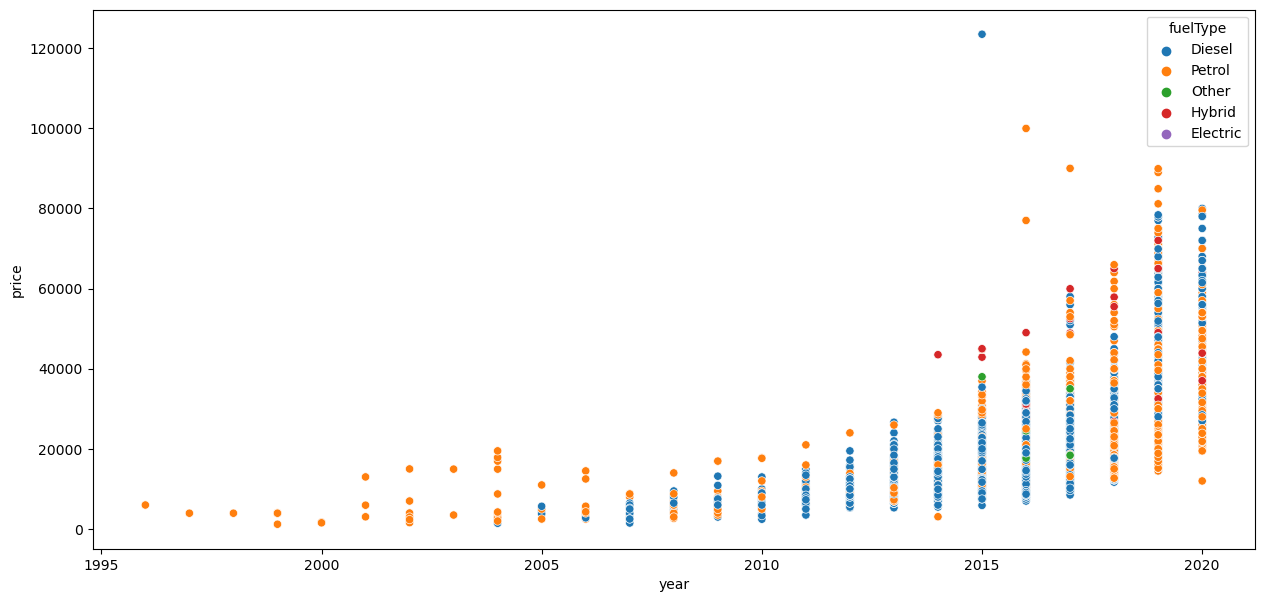

In [37]:
plt.figure(figsize=(15,7)) 
sns.scatterplot(x = bmw["year"],y = bmw["price"], hue = bmw["fuelType"])

We can see that price of the car is high when the car is new. As the age of the car is increasing price of the car is decreasing. Also, most of the oldest cars are petrol engines. So petrol car is lasting for a long period.

#### Depending on the year, determining which vehicles are the most popular:

Here BMW data is grouped by year column and count the number of cars in each year.

In [38]:
bmw_gy = bmw
bmw_gy = bmw_gy.groupby("year")
bmw_yb = bmw_gy["model"].count()
bmw_yb = pd.DataFrame(bmw_yb)
bmw_yb.sort_values(by=['model'], ascending=False, inplace=True)
bmw_yb.head(10)

,model
year,
2019,3485
2016,1882
2017,1721
2015,922
2018,848
2020,733
2014,501
2013,357
2012,119


I am plotting a bar chart for the number of models in each year.

<AxesSubplot:xlabel='year'>

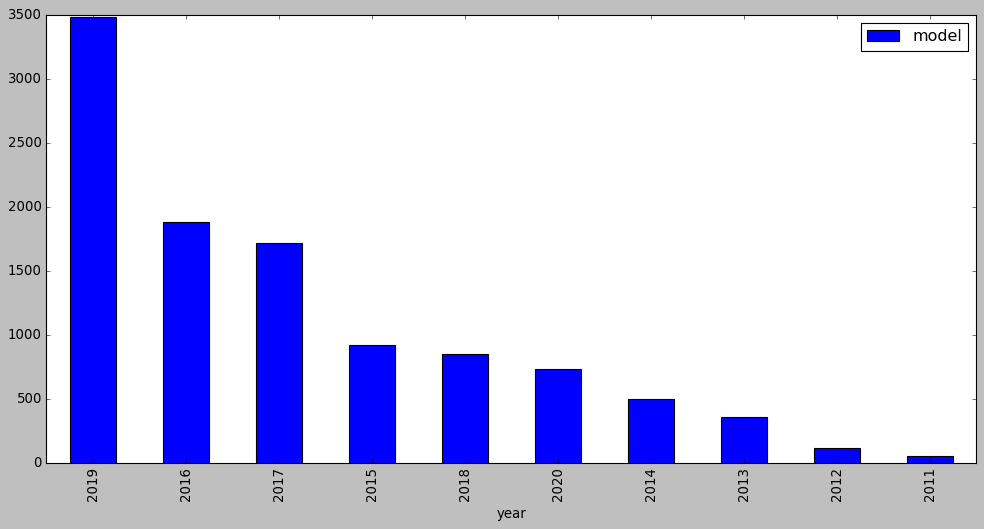

In [39]:
plt.style.use('classic')
bmw_yb.head(10).plot.bar(figsize=(15,7))

This bar chart shows there cars in the our data is mostly from 2019, 2016 and 2017.

#### The average amount spent on a model year after year:

BMW data is grouped by year and have taken the mean of each year. This will give the average price of the cars based on the registered year.

In [42]:
bmw_gy = bmw
bmw_gy = bmw_gy.groupby("year")
bmw_py = bmw_gy["price"].mean()

bmw_py = pd.DataFrame(bmw_py)
bmw_py = bmw_py.round(1)
bmw_py.sort_values(by=['price'], ascending=False, inplace=True)
bmw_py_2 = bmw_py.head(11)
bmw_py_2

,price
year,
2020,35377.7
2019,31025.9
2018,22721.7
2017,19267.2
2016,16638.4
2015,15199.8
2014,13323.6
2013,11118.4
2012,9533.7


Plotting the heatmap for the average price of the cars in each years.

Text(0.5, 47.7222222222222, 'Average amount spent')

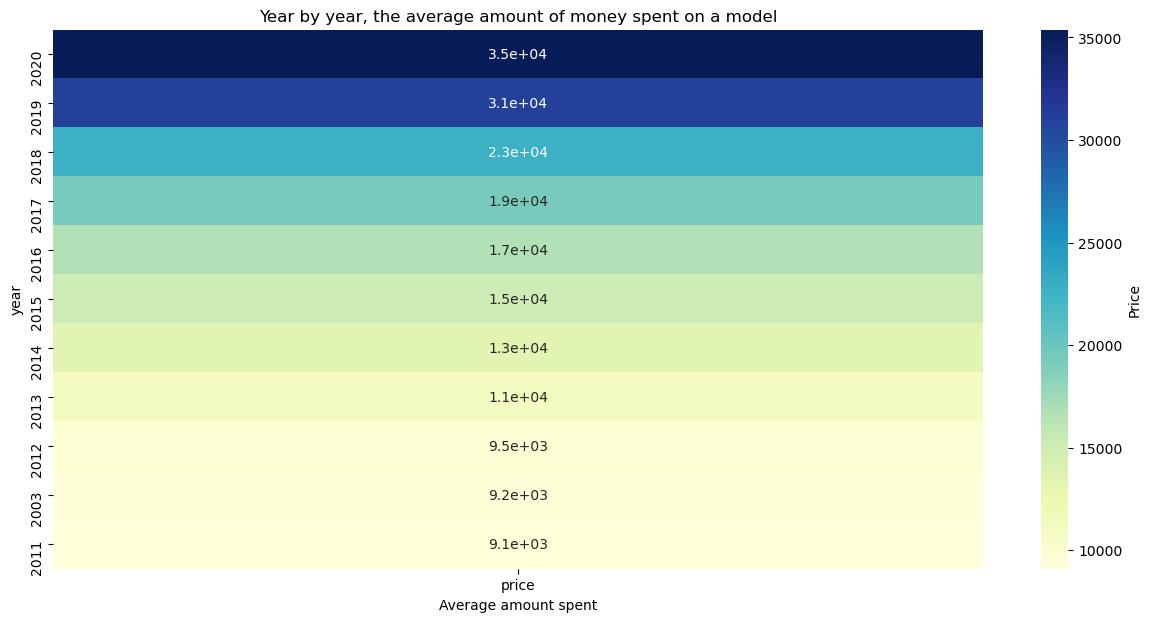

In [44]:
plt.style.use('default')
plt.figure(figsize=(15,7)) 
sns.heatmap(data=bmw_py_2, cmap="YlGnBu", cbar_kws={'label': 'Price'}, annot=True)
plt.title("Year by year, the average amount of money spent on a model")
plt.xlabel("Average amount spent")

From above, the new cars are costly than the old cars.

#### Analysing the gear box over the years

To start with it, First count plot is plotted to find the number of counts of each gearbox.

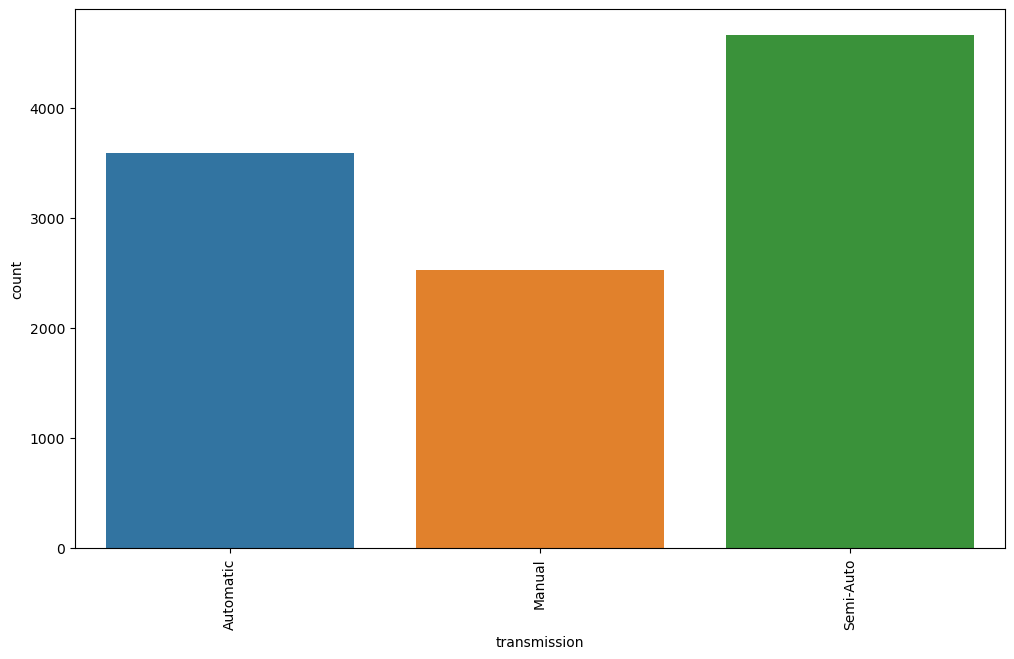

In [48]:
plt.figure(figsize=(12,7))
count_model = sns.countplot(x = bmw["transmission"])
count_model.tick_params(axis='x', rotation=90)

In [49]:
bmw_gt = bmw
bmw_gt = bmw_gt.groupby("transmission")
bmw_mt = bmw_gt["model"].count()

bmw_mt = pd.DataFrame(bmw_mt)

bmw_mt

,model
transmission,
Automatic,3588
Manual,2527
Semi-Auto,4666


Above result shows the count of each transmission.

Now, splitting the BMW dataset into a different dataset for each transmission. Each dataset is grouped by year. Cars in each years are counted and created a new dataset for count.

In [53]:
automatic_data = bmw[bmw["transmission"]=="Automatic"]
automatic_data_gy = automatic_data.groupby("year")
automatic_data_gy_c = automatic_data_gy["model"].count()
automatic_data_gy_c = pd.DataFrame(automatic_data_gy_c)


Manual_data = bmw[bmw["transmission"]=="Manual"]
Manual_data_gy = Manual_data.groupby("year")
Manual_data_gy_c = Manual_data_gy["model"].count()
Manual_data_gy_c = pd.DataFrame(Manual_data_gy_c)


Semi_Auto_data = bmw[bmw["transmission"]=="Semi-Auto"]
Semi_Auto_data_gy = Semi_Auto_data.groupby("year")
Semi_Auto_data_gy_c = Semi_Auto_data_gy["model"].count()
Semi_Auto_data_gy_c = pd.DataFrame(Semi_Auto_data_gy_c)

In [54]:
automatic_data_gy_c2 = automatic_data_gy_c
#reset the index
automatic_data_gy_c2 = automatic_data_gy_c2.reset_index()
automatic_data_gy_c2.describe()

,year,model
count,23.000000,23.000000
mean,2008.913043,156.000000
std,6.940743,275.450045
min,1996.000000,1.000000
25%,2003.500000,3.000000
50%,2009.000000,11.000000
75%,2014.500000,170.500000
max,2020.000000,997.000000


In [55]:
Manual_data_gy_c2 = Manual_data_gy_c
Manual_data_gy_c2 = Manual_data_gy_c2.reset_index()
Manual_data_gy_c2.describe()

,year,model
count,23.000000,23.000000
mean,2008.739130,109.869565
std,7.130073,178.360795
min,1997.000000,1.000000
25%,2003.000000,3.000000
50%,2009.000000,20.000000
75%,2014.500000,149.500000
max,2020.000000,637.000000


In [56]:
Semi_Auto_data_gy_c2 = Semi_Auto_data_gy_c
Semi_Auto_data_gy_c2 = Semi_Auto_data_gy_c2.reset_index()
Semi_Auto_data_gy_c2.describe()

,year,model
count,11.000000,11.000000
mean,2014.090909,424.181818
std,4.657350,582.025054
min,2006.000000,1.000000
25%,2011.000000,32.000000
50%,2015.000000,252.000000
75%,2017.500000,551.500000
max,2020.000000,2005.000000


We are now joining all counted datasets into one dataset so that we can plot the line chart.

In [58]:
ty_dataset = Manual_data_gy_c2.merge(automatic_data_gy_c2, how= "left", on = "year")
ty_dataset = ty_dataset.merge(Semi_Auto_data_gy_c2, how= "left", on = "year")
ty_dataset = ty_dataset.rename({"model_x": "manual", "model_y": "automatic", "model": "semi-auto"}, axis='columns')
ty_dataset = ty_dataset.fillna(0)
ty_dataset.dtypes

year           int64
manual         int64
automatic    float64
semi-auto    float64
dtype: object

In [61]:
ty_dataset["automatic"] = ty_dataset["automatic"].astype('int64')
ty_dataset["semi-auto"] = ty_dataset["semi-auto"].astype('int64')
ty_dataset.head()

,year,manual,automatic,semi-auto
0,1997,1,0,0
1,1998,1,0,0
2,1999,3,1,0
3,2000,1,1,0
4,2001,2,1,0


Plotting the line chart

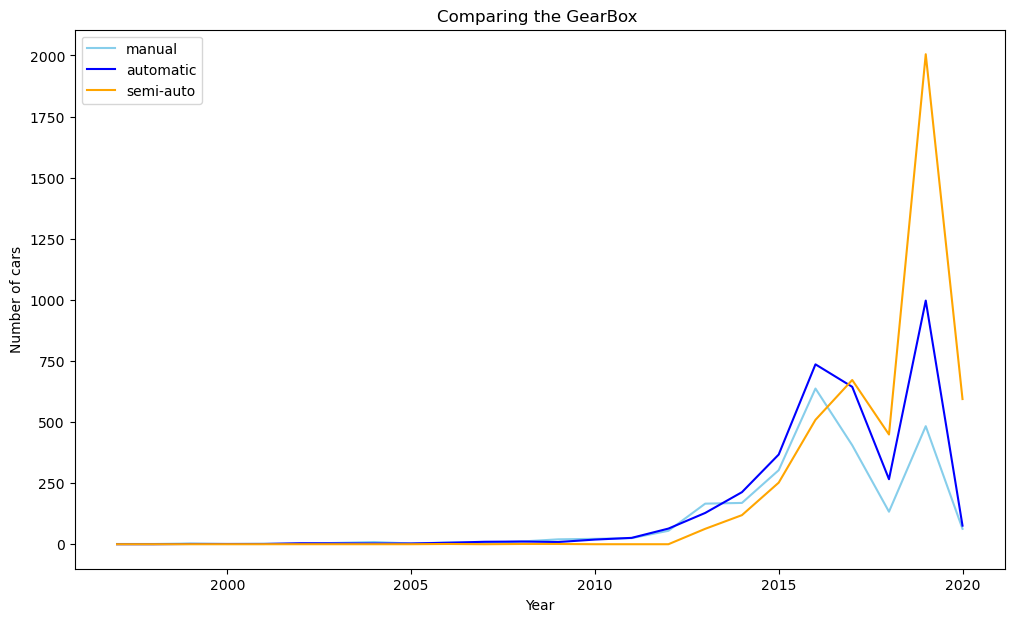

In [62]:
plt.figure(figsize=(12,7)) 
plt.plot( 'year', 'manual', data=ty_dataset,  color='skyblue')
plt.plot( 'year', 'automatic', data=ty_dataset, color='blue')
plt.plot( 'year', 'semi-auto', data=ty_dataset, color='orange')
# show legend
plt.legend()

plt.title('Comparing the GearBox ')
plt.xlabel('Year')
plt.ylabel('Number of cars')

# show graph
plt.show()

The above chart shows that new cars are mostly semi-auto cars in the UK, followed by automatic cars and then manual cars. From here, we can clearly see that people are turning to use automatic cars than manual cars. 

#### Analysing the fule type over the years

To start with it, Count plot is plotted to find the number of counts of each fule type.

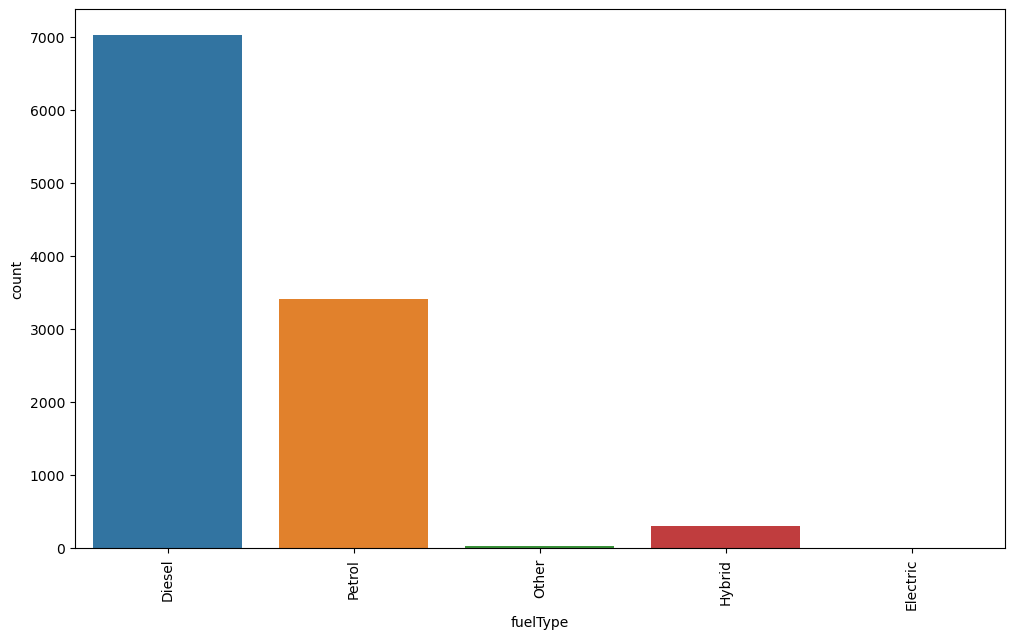

In [64]:
plt.figure(figsize=(12,7))
count_model = sns.countplot(x = bmw["fuelType"])
count_model.tick_params(axis='x', rotation=90)

In [65]:
bmw_gf = bmw
bmw_gf = bmw_gf.groupby("fuelType")
bmw_mf = bmw_gf["model"].count()

bmw_mf = pd.DataFrame(bmw_mf)

bmw_mf

,model
fuelType,
Diesel,7027
Electric,3
Hybrid,298
Other,36
Petrol,3417


Above result shows the count of each fule type.

Now, splitting the BMW dataset into a different dataset for each fule types. Each dataset is grouped by year. Cars in each years are counted and created a new dataset for count.

In [66]:
Diesel_data = bmw[bmw["fuelType"]=="Diesel"]
Diesel_data_gy = Diesel_data.groupby("year")
Diesel_data_gy_c = Diesel_data_gy["model"].count()
Diesel_data_gy_c = pd.DataFrame(Diesel_data_gy_c)


Hybrid_data = bmw[bmw["fuelType"]=="Hybrid"]
Hybrid_data_gy = Hybrid_data.groupby("year")
Hybrid_data_gy_c = Hybrid_data_gy["model"].count()
Hybrid_data_gy_c = pd.DataFrame(Hybrid_data_gy_c)


Petrol_data = bmw[bmw["fuelType"]=="Petrol"]
Petrol_data_gy = Petrol_data.groupby("year")
Petrol_data_gy_c = Petrol_data_gy["model"].count()
Petrol_data_gy_c = pd.DataFrame(Petrol_data_gy_c)

In [67]:
Diesel_data_gy_c2 = Diesel_data_gy_c
Diesel_data_gy_c2 = Diesel_data_gy_c2.reset_index()
Diesel_data_gy_c2.head()

,year,model
0,2004,2
1,2005,3
2,2006,5
3,2007,10
4,2008,11


In [68]:
Hybrid_data_gy_c2 = Hybrid_data_gy_c
Hybrid_data_gy_c2 = Hybrid_data_gy_c2.reset_index()
Hybrid_data_gy_c2.head()

,year,model
0,2013,1
1,2014,6
2,2015,6
3,2016,78
4,2017,66


In [69]:
Petrol_data_gy_c2 = Petrol_data_gy_c
Petrol_data_gy_c2 = Petrol_data_gy_c2.reset_index()
Petrol_data_gy_c2.head()

,year,model
0,1996,1
1,1997,1
2,1998,1
3,1999,4
4,2000,2


We are now joining all counted datasets into one dataset so that we can plot the line chart.

In [70]:
fy_dataset = Petrol_data_gy_c2.merge(Hybrid_data_gy_c2, how= "left", on = "year")
fy_dataset = fy_dataset.merge(Diesel_data_gy_c2, how= "left", on = "year")
fy_dataset = fy_dataset.rename({"model_x": "Petrol", "model_y": "Hybrid", "model": "Diesel"}, axis='columns')
fy_dataset = fy_dataset.fillna(0)
fy_dataset.dtypes

year        int64
Petrol      int64
Hybrid    float64
Diesel    float64
dtype: object

In [71]:
fy_dataset["Hybrid"] = fy_dataset["Hybrid"].astype('int64')
fy_dataset["Diesel"] = fy_dataset["Diesel"].astype('int64')
fy_dataset.head()

,year,Petrol,Hybrid,Diesel
0,1996,1,0,0
1,1997,1,0,0
2,1998,1,0,0
3,1999,4,0,0
4,2000,2,0,0


Plotting the line chart for fuel types over the years.

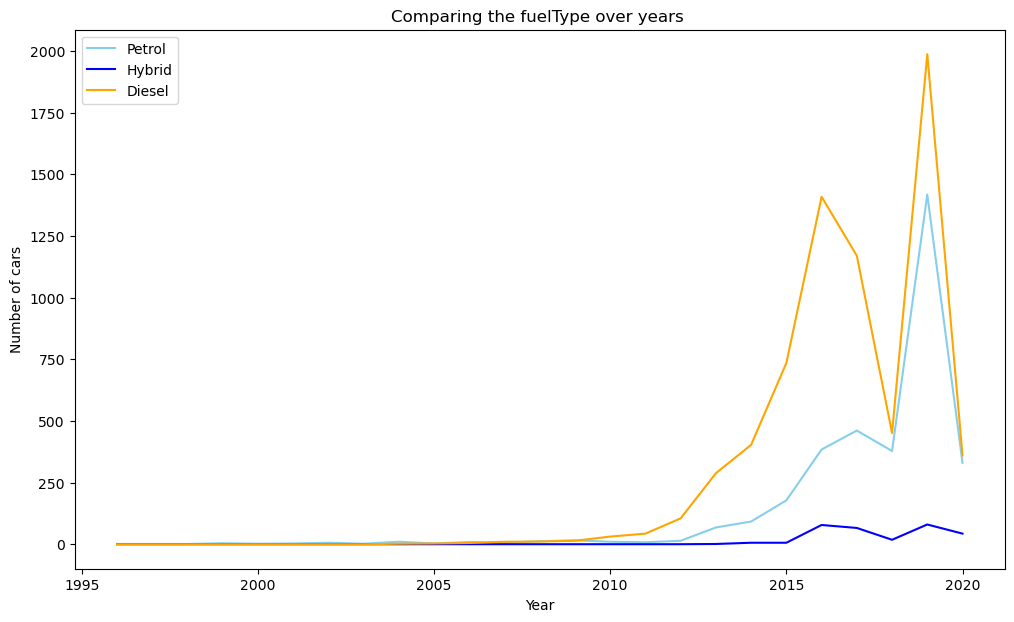

In [72]:
plt.figure(figsize=(12,7)) 
plt.plot( 'year', 'Petrol', data=fy_dataset,  color='skyblue')
plt.plot( 'year', 'Hybrid', data=fy_dataset, color='blue')
plt.plot( 'year', 'Diesel', data=fy_dataset, color='orange')
# show legend
plt.legend(loc='upper left')

plt.title('Comparing the fuelType over years ')
plt.xlabel('Year')
plt.ylabel('Number of cars')

# show graph
plt.show()

The above line chart shows the sale of diesel cars are high in count than the petrol cars. The sale of diesel cars of 2016 is facing the peak then suddenly there is a dip in the sales, and again sale of the cars get increased on car Registered in 2019. From hear we can clearly say that new cars are more soled.

## _Objective 2_

### _Predicting the price of the Used BMW Cars_

To start with modelling, we need to prepare the data for it. 

First, we are checking the correlation between each column. This will show how much columns are related to each other.

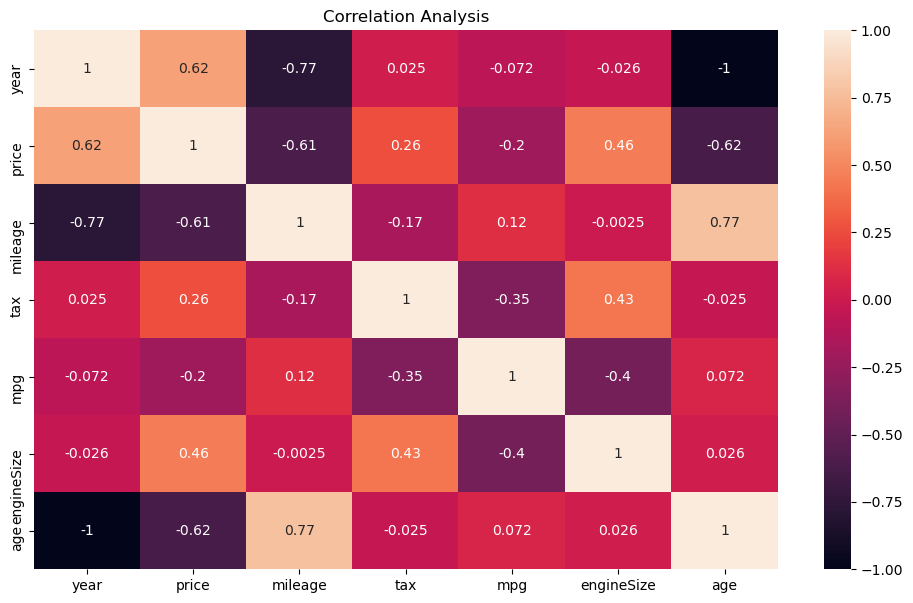

In [87]:
plt.figure(figsize=(12,7)) 
sns.heatmap(bmw.corr(), annot=True)
plt.title("Correlation Analysis")
plt.show()

The above Correlation shows that mileage, mpg columns are not related to the price columns.

In [74]:
bmw_d = bmw
bmw_d.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,7
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,3
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,5
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,4
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,7


Now we are creating the dummies for all characters columns because, in machine learning, we can feed the input through the numerical values only. So, we are converting all the characters columns into numerical and dropping the characters columns.

In [75]:
bmw_d = pd.concat([bmw_d, bmw_d['model'].str.get_dummies(sep=",")], 1)
bmw_d = pd.concat([bmw_d, bmw_d['transmission'].str.get_dummies(sep=",")], 1)
bmw_d = pd.concat([bmw_d, bmw_d['fuelType'].str.get_dummies(sep=",")], 1)


bmw_d = bmw_d.drop('model', 1)
bmw_d = bmw_d.drop('transmission', 1)
bmw_d = bmw_d.drop('fuelType', 1)

We are dropping the year column because we have an age column.

In [76]:
bmw_d.drop('year',axis=1,inplace=True)
bmw_d.head()

,price,mileage,tax,mpg,engineSize,age,1 Series,2 Series,3 Series,4 Series,...,i3,i8,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,11200,67068,125,57.6,2.0,7,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,27000,14827,145,42.8,2.0,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,16000,62794,160,51.4,3.0,5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12750,26676,145,72.4,1.5,4,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,14500,39554,160,50.4,3.0,7,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split

Dataset is ready to create models. Now, I am splitting the dataset into a training dataset and a testing dataset.

In [78]:
X = bmw_d.drop('price',axis=1)
y = bmw_d['price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

The following packages must be imported in order to create models.

In [80]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

Now, we are fitting the training dataset in different models and predicting the test score. With this score, we can find the best models which suit this problem.

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

LR_Score = r2_score(y_test_pred,y_test)
LR_Score

0.85970040228781

In [82]:
rf = RandomForestRegressor(random_state=50)
rf.fit(X_train,y_train)
y_test_pred2 = rf.predict(X_test)

RF_score = r2_score(y_test_pred2,y_test)
RF_score

0.9558273093611489

In [83]:
r = Ridge()
r.fit(X_train,y_train)
y_test_pred3 = r.predict(X_test)

r_score = r2_score(y_test_pred3,y_test)
r_score

0.8585020055211864

In [84]:
l = Lasso()
l.fit(X_train,y_train)
y_test_pred4 = l.predict(X_test)

l_score = r2_score(y_test_pred4,y_test)
l_score

/Users/raghulsekar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62519446507.83631, tolerance: 112790724.71875542
  model = cd_fast.enet_coordinate_descent(


0.8592052249172866

In [85]:
output = {
  "Linear Regression": LR_Score,
  "Random Forest Regressor": RF_score,
  "Ridge": r_score,
  "Lasso": l_score
}

output = pd.DataFrame.from_dict(output, orient='index')

output = output.rename_axis("model", axis="columns")
output.rename(columns = {0: "r2 Score"}, inplace=True)
output

model,r2 Score
Linear Regression,0.859700
Random Forest Regressor,0.955827
Ridge,0.858502
Lasso,0.859205


The accuracy score of all the models for this dataset is shown in the table above. We can see that the random forest regressor has the greatest accuracy rate of 95.5 percent, indicating that it is the best model of the four.

# Project Outcome (10 + 10 marks)



## Overview of Results

   _In general, results from this BMW dataset are all about finding the Attributes that affect the price of the used cars and predicting the price of the used cars in the united kingdom. For this, I have virtualized the different type charts. From these charts, we can get the exact information needed by looking at it._

   _A Scatter plot is plotted to find how mileage affects the price with years, fule types and engine size. Also, there is another scatter plot and heat map which shows how a car's year of registration affects the price. Line chart from our result will compare each transmission of the cars with the cars years which will have the result to know which year car model has how many cars of transmission. Same like that, there is another line chat that will compare with fule types. Many people are willing to know their car price, so that I used this dataset to create four models that will predict the price of the used cars in the united kingdom based on the attributes._

## Objective 1

### Explanation of Results

_Objective 1 is all about Virtual analysis of the data of the used BMW cars in the United Kingdom. From this analysis, we came to know that majority of the used BMW cars are from the last ten years. In comparison to older automobiles, cars with less miles travelled are more expensive. Diesel engines are the most often utilised, followed by petrol engines._

_In addition, we can see that as the size of the engine grows larger, the automobiles last longer. 2019 model cars are the car model which sold in high quantities then followed by 2016 and 2017. As previously said, the price of the automobiles for the 2020 model year is rather expensive. Semi-auto vehicles have been utilised more than automatic or manual cars in terms of transmission. The majority of the cars in the 2019 model year are semi-automobiles. We can also see that the dataset is dominated by diesel vehicles._




### Visualisation

_This scatter plot demonstrates that most diesel automobiles are less expensive and have logged more kilometres than petrol vehicles. Petrol vehicles have a greater price than diesel cars with lower mileage, and as the mileage grows, the price of diesel cars decreases. When the mileage is low, we can tell that the price is high. As the mileage of an automobile grows, the price of the car lowers._

<AxesSubplot:xlabel='mileage', ylabel='price'>

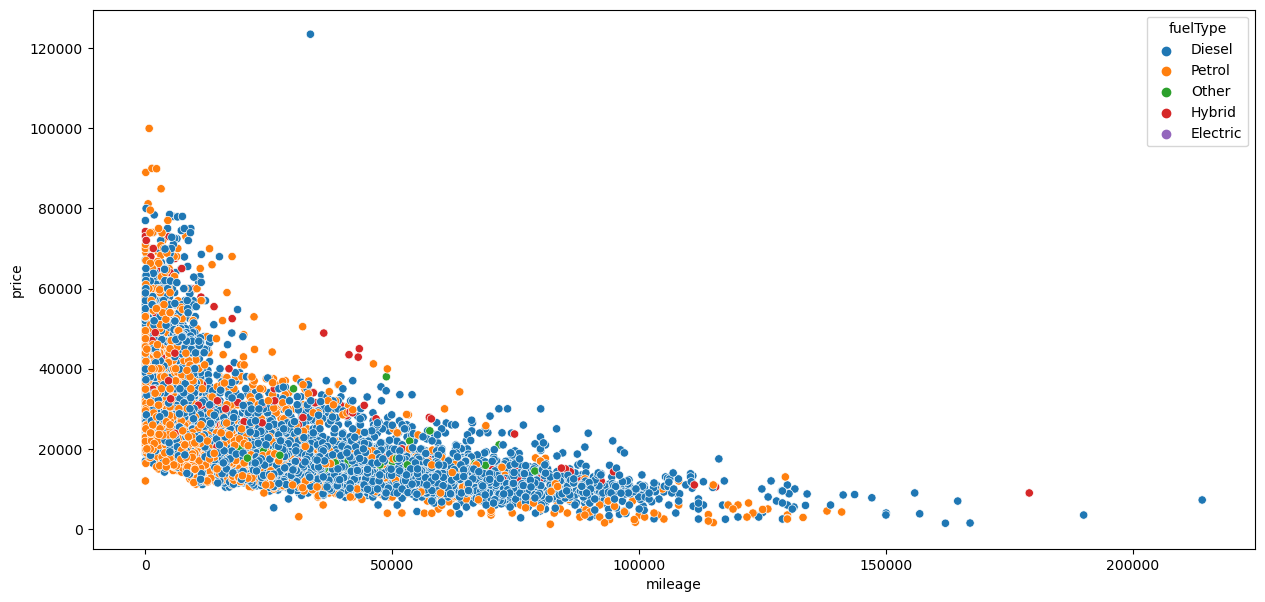

In [89]:
plt.figure(figsize=(15,7)) 
sns.scatterplot(x = bmw["mileage"], y = bmw["price"], hue = bmw["fuelType"])

## Objective 2

### Explanation of Results

_The second objective is to forecast the price of used BMW automobiles based on the supplied attitudes. The mileage and mpg columns are unrelated to the price column, according to the correlation matrix. Then, for the character columns, dummies are produced so that the data may be utilised to create the models._

_I made four models in order to choose the best one. Ridge, Lasso, Linear Regression, Random Forest Regressor These machine learning methods are trained using a separate training set from the data used to create the model. The testing dataset is used to put the trained model to the test. The best model is one that has a high accuracy score. The Random Forest Regressor is the best model that forecasts the price of used BMW cars with the greatest accuracy rate and best performance among the models that I have created here._

### Visualisation

_There is no visualization in this objective._

_But there is a table that shows the Accuracy value of all models. From this, we can see the random forest regressor is the best model which predicts the accurate price._

In [88]:
output

model,r2 Score
Linear Regression,0.859700
Random Forest Regressor,0.955827
Ridge,0.858502
Lasso,0.859205


# Conclusion (5 marks)



### Acheivements
_From the result, we are able to predict the price of the used BMW cars in the united kingdom. The Random Forest Regressor model is the best model for reliably predicting the price of secondhand automobiles. As a result, understanding the price of their used cars using this approach makes individuals more helpful. In addition, the virtualization we created allows us to discover that recently purchased automobiles are sold at a premium price on the used market. We learned about the characteristics that influence the pricing of secondhand automobiles._

_The price is influenced by so many factors that pinpointing the primary cause of price fluctuation is difficult. we can see, the 3 series is the most popular BMW vehicle in the United Kingdom. The majority of automobiles have been purchased in the previous three to four years._


### Future Work

_In the future, we'd like to collect more data on used automobiles from other manufacturers and develop a machine learning model that can better forecast the price. Apart from secondhand cars, we can also acquire data on buses, lorries, and other vehicles. This will aid the used car industry in estimating the value of vehicles based on their condition._

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [56]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60